### Decision Tree with ID3

In [17]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [18]:
data = {
    'Outlook': ['Sunny', 'Sunny', 'Overcast', 'Rain', 'Rain', 'Rain', 'Overcast', 'Sunny', 'Sunny', 'Rain', 'Sunny', 'Overcast', 'Overcast', 'Rain'],
    'Temperature': ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool', 'Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild'],
    'Humidity': ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'High'],
    'Wind': ['Weak', 'Strong', 'Weak', 'Weak', 'Weak', 'Strong', 'Strong', 'Weak', 'Weak', 'Weak', 'Strong', 'Strong', 'Weak', 'Strong'],
    'PlayTennis': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']
}

In [19]:
df = pd.DataFrame(data)


In [20]:
encoders = {}
for col in df.columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = le  # store encoder for reuse

In [21]:
# Split features & target
X = df.drop('PlayTennis', axis=1)
y = df['PlayTennis']

In [23]:
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(X, y)

,criterion,'entropy'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


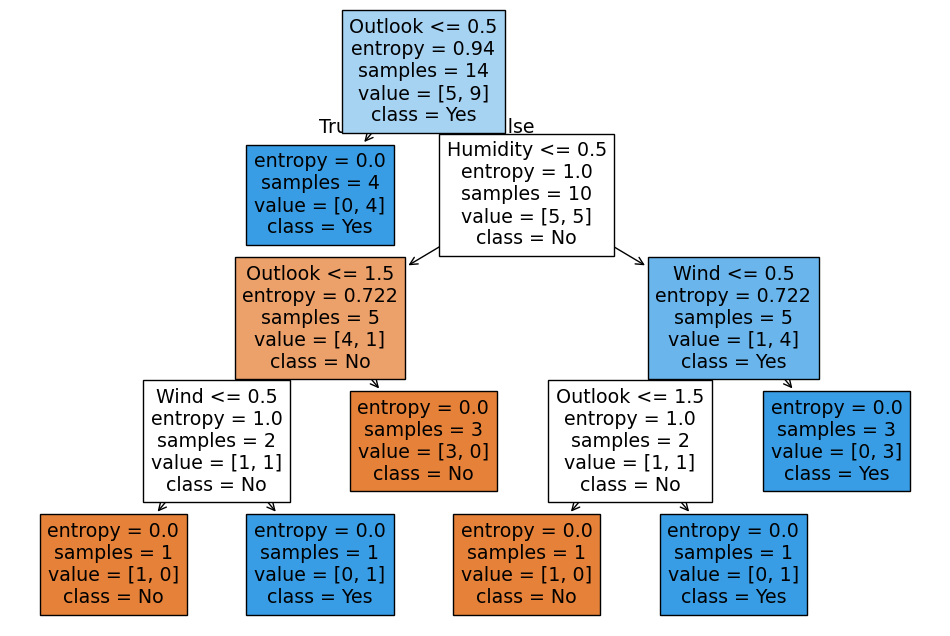

In [24]:
plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=X.columns, class_names=['No', 'Yes'], filled=True)
plt.show()


In [25]:
# Classify new Dataset
new_sample = pd.DataFrame({
    'Outlook': ['Sunny'],
    'Temperature': ['Cool'],
    'Humidity': ['High'],
    'Wind': ['Strong']
})

In [26]:
for col in new_sample.columns:
    new_sample[col] = encoders[col].transform(new_sample[col])


In [27]:
prediction = clf.predict(new_sample)
print("Prediction for new sample:", "Yes" if prediction[0] == 1 else "No")

Prediction for new sample: No


In [42]:
# Classify new Dataset
new_sample01 = pd.DataFrame({
    'Outlook': ['Sunny'],
    'Temperature': ['Cool'],
    'Humidity': ['Normal'],
    'Wind': ['Weak']
})

In [43]:
for col in new_sample01.columns:
    new_sample01[col] = encoders[col].transform(new_sample01[col])


In [44]:
prediction = clf.predict(new_sample01)
print("Prediction for new sample:", "Yes" if prediction[0] == 1 else "No")

Prediction for new sample: Yes
